# 3회차 실습 과제: 추정과 가설검정

## 문제 항목

| 문제     | 주제                 | 핵심 개념                                       |
|----------|----------------------|-------------------------------------------------|
| 문제 1   | 신뢰구간 계산        | 점추정, 구간추정, 신뢰수준, 표본크기 결정        |
| 문제 2   | 단일표본 검정        | 가설 설정, t-검정, p-value 해석, 결론 도출       |
| 문제 3   | 두 그룹 비교         | 독립표본 t-검정, 효과크기, 단일 vs 독립 vs 대응 구분     |
| 문제 4   | 전후 비교   | 대응표본 t-검정, 검정력   |

---

## 핵심 공식 정리

### 신뢰구간

| 조건              | 공식                                                             |
|-------------------|------------------------------------------------------------------|
| σ를 아는 경우     | $\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$       |
| σ를 모르는 경우   | $\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$      |
| 필요 표본크기     | $n = \left(\frac{z_{\alpha/2} \cdot \sigma}{E}\right)^2$       |

### 검정통계량

| 검정               | 공식                                                                             |
|--------------------|----------------------------------------------------------------------------------|
| z-검정             | $z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$                                |
| 단일표본 t-검정    | $t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}, \quad df = n - 1$                   |
| 독립표본 t-검정    | $t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_1^2/n_1 + s_2^2/n_2}}$              |
| 대응표본 t-검정    | $t = \frac{\bar{d}}{s_d / \sqrt{n}}, \quad d_i = X_{after} - X_{before}$       |
| Cohen's d          | $d = \frac{|\bar{X}_1 - \bar{X}_2|}{s_{pooled}}$                               |

### scipy.stats 핵심 함수

| 함수                          | 설명                           | 사용 예시                                    |
|-------------------------------|--------------------------------|----------------------------------------------|
| `stats.t.interval()`         | t분포 기반 신뢰구간            | `stats.t.interval(0.95, df, loc, scale)`     |
| `stats.t.ppf()`              | t분포 임계값                   | `stats.t.ppf(0.975, df=29)`                 |
| `stats.ttest_1samp()`        | 단일표본 t-검정                | `stats.ttest_1samp(data, popmean=100)`       |
| `stats.ttest_ind()`          | 독립표본 t-검정                | `stats.ttest_ind(a, b, equal_var=False)`     |
| `stats.ttest_rel()`          | 대응표본 t-검정                | `stats.ttest_rel(after, before)`             |
| `stats.sem()`                | 표준오차 계산                  | `stats.sem(data)`                            |

### 판정 규칙

| p-value 결과  | 판정             | 해석                                          |
|---------------|------------------|-----------------------------------------------|
| p ≤ α         | H0 **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 유의   |
| p > α         | H0 **기각 실패** | "증거 부족, 판단 보류" (H0가 참은 아닙니다!)    |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform
from statsmodels.stats.power import TTestPower

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("=" * 60)
print("3회차 실습 과제: 추정과 가설검정")
print("=" * 60)

3회차 실습 과제: 추정과 가설검정


---

## 문제 1: 신뢰구간 계산

### 시나리오: 배달 앱 배달 시간 분석

배달 앱 운영팀이 평균 배달 시간을 파악하려 합니다.

40건의 배달 데이터를 수집했습니다.

**주어진 데이터:**

In [2]:
print("\n[문제 1] 배달 앱 배달 시간 분석")
print("=" * 50)

np.random.seed(42)
delivery_times = np.random.normal(loc=35, scale=8, size=40)
delivery_times = np.round(delivery_times, 1)

print(f"배달 시간 데이터 (n = {len(delivery_times)}건):")
print(delivery_times)


[문제 1] 배달 앱 배달 시간 분석
배달 시간 데이터 (n = 40건):
[39.  33.9 40.2 47.2 33.1 33.1 47.6 41.1 31.2 39.3 31.3 31.3 36.9 19.7
 21.2 30.5 26.9 37.5 27.7 23.7 46.7 33.2 35.5 23.6 30.6 35.9 25.8 38.
 30.2 32.7 30.2 49.8 34.9 26.5 41.6 25.2 36.7 19.3 24.4 36.6]


### 문제 1-1: 점추정

**(a)** 모평균의 점추정값(표본평균)을 구하세요.

**(b)** 모표준편차의 점추정값(표본표준편차, ddof=1)을 구하세요.

**(c)** 표준오차(SE)를 구하세요.

In [3]:
print("\n[문제 1-1] 점추정")
print("-" * 40)

# TODO (a): 표본평균
x_bar = np.mean(delivery_times)

print(f"(a) 표본평균 = {x_bar:.2f}")

# TODO (b): 표본표준편차 (ddof=1)
s = np.std(delivery_times, ddof = 1)

print(f"(b) 표본표준편차 = {s:.2f}")

# TODO (c): 표준오차 SE = s / sqrt(n)
se = s / np.sqrt(len(delivery_times))

print(f"(c) 표준오차 SE = {se:.2f}")



[문제 1-1] 점추정
----------------------------------------
(a) 표본평균 = 33.25
(b) 표본표준편차 = 7.62
(c) 표준오차 SE = 1.21


### 문제 1-2: 신뢰구간 구하기

**(a)** 95% 신뢰구간을 **수동으로** 계산하세요.

**(b)** `stats.t.interval()`를 사용하여 95% 신뢰구간을 구하세요.

**(c)** 90%, 95%, 99% 신뢰구간을 모두 구하고, 구간 너비를 비교하세요.

> 신뢰수준이 높아지면 구간 너비는 어떻게 변하나요?

In [4]:
print("\n[문제 1-2] 신뢰구간 구하기")
print("-" * 40)

n = len(delivery_times)
alpha = 0.05

# TODO (a): 수동 계산
t_crit = stats.t.ppf(1 - alpha / 2, df = n - 1)  # t 임계값
margin = t_crit * np.std(delivery_times, ddof = 1) / np.sqrt(n)  # 오차한계 = t_crit * se
ci_low = np.mean(delivery_times) - margin  # 하한
ci_high = np.mean(delivery_times) + margin  # 상한

print(f"(a) 수동 계산:")
print(f"    t 임계값 (df={n-1}): {t_crit}")
print(f"    오차한계: ±{margin}")
print(f"    95% CI: [{ci_low:.2f}, {ci_high:.2f}]")


# TODO (b): scipy.stats 활용
ci_scipy = stats.t.interval(0.95, df = n - 1, loc = np.mean(delivery_times), scale = stats.sem(delivery_times))  # scipy활용 신뢰 구간

print(f"\n(b) scipy 활용:")
print(f"    95% CI: [{ci_scipy[0]:.2f}, {ci_scipy[1]:.2f}]")

# TODO (c): 세 가지 신뢰수준 너비 비교
print(f"\n(c) 신뢰수준별 비교:")
for confidence in [0.90, 0.95, 0.99]:
    ci = stats.t.interval(confidence, df = n - 1, loc = np.mean(delivery_times), scale = stats.sem(delivery_times))
    width = ci[1] - ci[0]
    print(f"    {confidence*100:.0f}% CI: [{ci[0]:.2f},{ci[1]:.2f}]  (너비: {width:.2f})")

print("\n 해석: 신뢰수준이 높아질 수록 구간의 넓이는 넓어진다.")



[문제 1-2] 신뢰구간 구하기
----------------------------------------
(a) 수동 계산:
    t 임계값 (df=39): 2.022690920036761
    오차한계: ±2.4374393979710707
    95% CI: [30.81, 35.68]

(b) scipy 활용:
    95% CI: [30.81, 35.68]

(c) 신뢰수준별 비교:
    90% CI: [31.21,35.28]  (너비: 4.06)
    95% CI: [30.81,35.68]  (너비: 4.87)
    99% CI: [29.98,36.51]  (너비: 6.53)

 해석: 신뢰수준이 높아질 수록 구간의 넓이는 넓어진다.


### 문제 1-3: 표본크기 결정

경영진이 "평균 배달 시간의 **오차한계를 ±1분 이내**로 하고 싶다"고 합니다.

**(a)** 95% 신뢰수준에서 필요한 최소 표본크기를 구하세요.

**(b)** 오차한계를 ±0.5분으로 줄이면 표본크기가 어떻게 변하나요?

In [5]:
print("\n[문제 1-3] 표본크기 결정")
print("-" * 40)

z_95 = 1.96
sigma_est = np.std(delivery_times, ddof=1)  # 표본표준편차를 σ 추정치로 사용

# TODO (a): 오차한계 ±1분
E1 = 1.0
n_required_1 = np.ceil( (z_95 * sigma_est / E1) ** 2)  # (z_95 * sigma_est / E1) ** 2 → 올림

print(f"(a) 오차한계 ±{E1}분 → 필요 표본크기: {n_required_1}건")


# TODO (b): 오차한계 ±0.5분
E2 = 0.5
n_required_2 = np.ceil( (z_95 * sigma_est / E2) ** 2)

print(f"(b) 오차한계 ±{E2}분 → 필요 표본크기: {n_required_2}건")

print(f"\n 해석: 오차한계가 줄어들 수록 필요한 표본 크기는 커진다.")


[문제 1-3] 표본크기 결정
----------------------------------------
(a) 오차한계 ±1.0분 → 필요 표본크기: 224.0건
(b) 오차한계 ±0.5분 → 필요 표본크기: 893.0건

 해석: 오차한계가 줄어들 수록 필요한 표본 크기는 커진다.


---

## 문제 2: 단일표본 t-검정

### 시나리오: 음료 자판기 용량 검사

자판기 제조사는 커피 한 잔의 용량이 **200ml**이라고 주장합니다.

소비자 보호원이 무작위로 20잔을 측정하여 주장을 검증합니다.

**주어진 데이터:**

In [6]:
print("\n[문제 2] 자판기 용량 검사")
print("=" * 50)

np.random.seed(123)
coffee_ml = np.random.normal(loc=196, scale=6, size=20)
coffee_ml = np.round(coffee_ml, 1)

print(f"측정 데이터 (n = {len(coffee_ml)}잔):")
print(coffee_ml)
print(f"\n표본평균: {np.mean(coffee_ml):.2f}ml")
print(f"표본표준편차: {np.std(coffee_ml, ddof=1):.2f}ml")



[문제 2] 자판기 용량 검사
측정 데이터 (n = 20잔):
[189.5 202.  197.7 187.  192.5 205.9 181.4 193.4 203.6 190.8 191.9 195.4
 204.9 192.2 193.3 193.4 209.2 209.1 202.  198.3]

표본평균: 196.68ml
표본표준편차: 7.54ml


### 문제 2-1: 가설검정 5단계

유의수준 α = 0.05에서, 자판기 용량이 200ml에 미달하는지 검정하세요.

**(a)** 가설을 설정하세요.

**(b)** `stats.ttest_1samp()`으로 검정통계량과 p-value를 구하세요.

**(c)** 결론을 내리세요. (기각 또는 기각 실패, 그 의미)

**(d)** 95% 신뢰구간(양측)을 구하고, 구간에 200이 포함되는지 확인하세요. 그래서 검정 결과와 일관되는지 확인 하세요.

In [7]:
print("\n[문제 2-1] 가설검정 5단계")
print("-" * 40)

mu_0 = 200  # 제조사 주장
alpha = 0.05

# TODO (a): 가설 설정
print("[1단계] 가설 설정")
print(f"  H0: mu = {mu_0}  (주장대로 200ml)")
print(f"  H1: mu < {mu_0}")
print(f"  검정 유형: 단일표본 t-test")

print(f"\n[2단계] 유의수준: alpha = {alpha}")


# TODO (b): 검정 실행(왜 양측으로 할까... 그냥 less쓰면 되지 않남)
t_stat = (np.mean(coffee_ml) - mu_0) / (np.std(coffee_ml, ddof = 1) / np.sqrt(len(coffee_ml)))
test_result = stats.ttest_1samp(coffee_ml, popmean = mu_0, alternative = 'less')  # stats.ttest_1samp 결과 (양측)
p_value = test_result[1]  # 단측이라면 /2, 양측이라면 그대로

print(f"\n[3단계] 검정통계량")
print(f"  t-통계량: {t_stat}")

print(f"\n[4단계] p-value")
print(f"  p-value (사용할 값): {p_value}")

# TODO (c): 결론
print(f"\n[5단계] 결론 : p-value가 {p_value}로 유의수준 5%하에서 귀무가설을 기각한다." )

# TODO (d): [참고] 95% 신뢰구간
ci_95 = stats.t.interval(0.95, df = len(coffee_ml) - 1, loc = np.mean(coffee_ml), scale = stats.sem(coffee_ml))

print(f"\n[참고] 95% 신뢰구간: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]")


[문제 2-1] 가설검정 5단계
----------------------------------------
[1단계] 가설 설정
  H0: mu = 200  (주장대로 200ml)
  H1: mu < 200
  검정 유형: 단일표본 t-test

[2단계] 유의수준: alpha = 0.05

[3단계] 검정통계량
  t-통계량: -1.972277642519237

[4단계] p-value
  p-value (사용할 값): 0.03165589388677901

[5단계] 결론 : p-value가 0.03165589388677901로 유의수준 5%하에서 귀무가설을 기각한다.

[참고] 95% 신뢰구간: [193.15, 200.20]


### 문제 2-2: p-value 해석 연습

다음 각 상황에서 올바른 해석을 고르세요.

**(a)** p-value = 0.03, α = 0.05 일 때 올바른 해석은?

1. "H0가 참일 확률이 3%이다"

2. "H0가 참일 때, 이 결과가 나올 확률이 3%이다"

3. "H1이 참일 확률이 97%이다"

**(b)** p-value = 0.12, α = 0.05 일 때, "H0가 참이다"라고 결론 내릴 수 있나요?

**(c)** 같은 데이터로 α = 0.01과 α = 0.10을 적용하면 결론이 달라질 수 있는 예를 설명하세요.

In [8]:
print("\n[문제 2-2] p-value 해석 연습")
print("-" * 40)

# TODO (a): 올바른 해석 번호
answer_a = 2  # 1, 2, 또는 3

print(f"(a) 올바른 해석: {answer_a}번")
print(f"귀무가설이 참이라는 가정 하에서 검정을 진행하기 때문이다.")


# TODO (b)
print(f"\n(b) p=0.12일 때 'H0가 참이다'라고 할 수 있나요?")
print(f"참이라기 보다는, 귀무가설을 기각할 수 없다가 더 올바른 해석이다.")


# TODO (c)
print(f"\n(c) 유의수준에 따른 결론 차이 예시:")
print(f"p-value가 0.04일 경우, 유의수준 1%하에서는 귀무가설을 기각할 수 없지만 유의수준 5%하에서는 귀무가설을 기각한다.")


[문제 2-2] p-value 해석 연습
----------------------------------------
(a) 올바른 해석: 2번
귀무가설이 참이라는 가정 하에서 검정을 진행하기 때문이다.

(b) p=0.12일 때 'H0가 참이다'라고 할 수 있나요?
참이라기 보다는, 귀무가설을 기각할 수 없다가 더 올바른 해석이다.

(c) 유의수준에 따른 결론 차이 예시:
p-value가 0.04일 경우, 유의수준 1%하에서는 귀무가설을 기각할 수 없지만 유의수준 5%하에서는 귀무가설을 기각한다.


---

## 문제 3: 독립표본 t-검정

### 시나리오: 온라인 vs 오프라인 강의 효과 비교

교육 기관에서 온라인 강의와 오프라인 강의의 학습 효과를 비교합니다.

두 그룹은 서로 다른 학생들로 구성되어 있습니다 (독립표본).

**주어진 데이터:**

In [9]:
print("\n[문제 3] 온라인 vs 오프라인 강의 효과 비교")
print("=" * 50)

np.random.seed(42)
online = np.random.normal(loc=75, scale=12, size=35)   # 온라인 강의
offline = np.random.normal(loc=80, scale=10, size=30)   # 오프라인 강의

print(f"온라인 강의 (n={len(online)}): 평균={np.mean(online):.2f}, SD={np.std(online, ddof=1):.2f}")
print(f"오프라인 강의 (n={len(offline)}): 평균={np.mean(offline):.2f}, SD={np.std(offline, ddof=1):.2f}")


[문제 3] 온라인 vs 오프라인 강의 효과 비교
온라인 강의 (n=35): 평균=73.41, SD=11.18
오프라인 강의 (n=30): 평균=77.74, SD=8.72


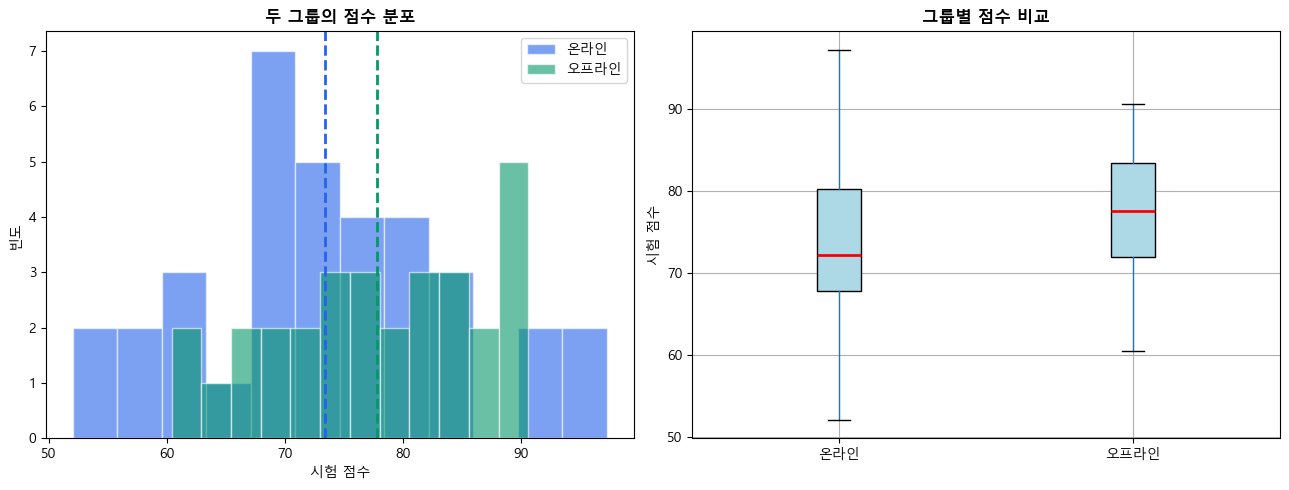

In [10]:
# 시각화: 두 그룹 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# 히스토그램 비교
axes[0].hist(online, bins=12, alpha=0.6, color='#2563EB', edgecolor='white', label='온라인')
axes[0].hist(offline, bins=12, alpha=0.6, color='#059669', edgecolor='white', label='오프라인')
axes[0].axvline(np.mean(online), color='#2563EB', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(offline), color='#059669', linestyle='--', linewidth=2)
axes[0].set_xlabel('시험 점수')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 그룹의 점수 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)

# 박스플롯
data_box = pd.DataFrame({
    '온라인': pd.Series(online),
    '오프라인': pd.Series(offline)
})
data_box.boxplot(ax=axes[1], patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('시험 점수')
axes[1].set_title(f'그룹별 점수 비교', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 문제 3-1: 독립표본 t-검정 수행

**(a)** 가설을 설정하세요.

> 두 강의 방식의 효과에 차이가 있는지 (양측검정)

**(b)** `stats.ttest_ind()`로 검정하세요.

> `equal_var=False`를 사용하여 Welch's t-test를 수행하세요 (등분산 가정 없이).

**(c)** α = 0.05에서 결론을 내리세요.

In [11]:
print("\n[문제 3-1] 독립표본 t-검정")
print("-" * 40)

alpha = 0.05

# TODO (a): 가설 설정
print('H0 : 두 강의 방식의 효과는 차이가 없다. (μA = μB)')
print('H1 : 두 강의 방식의 효과는 차이가 있다. (μA != μB)')

# TODO (b): Welch's t-test
t_stat, p_value = stats.ttest_ind(online, offline, equal_var = False)

# TODO (c): 결론
print(f'p-value가 {p_value:.2f}이므로 유의수준 5% 하에서 귀무가설을 기각할 수 없다.')


[문제 3-1] 독립표본 t-검정
----------------------------------------
H0 : 두 강의 방식의 효과는 차이가 없다. (μA = μB)
H1 : 두 강의 방식의 효과는 차이가 있다. (μA != μB)
p-value가 0.08이므로 유의수준 5% 하에서 귀무가설을 기각할 수 없다.


### 문제 3-2: 효과크기 (Cohen's d)

**(a)** Cohen's d를 계산하세요.

> 공식: $d = \frac{|\bar{X}_1 - \bar{X}_2|}{s_{pooled}}$
>
> $s_{pooled} = \sqrt{\frac{(n_1-1) s_1^2 + (n_2-1) s_2^2}{n_1 + n_2 - 2}}$

**(b)** 효과크기를 해석하세요. (작은/중간/큰 효과)

| d 값  | 해석      |
|-------|-----------|
| 0.2   | 작은 효과 |
| 0.5   | 중간 효과 |
| 0.8   | 큰 효과   |

**(c)** p-value 결과와 효과크기를 종합하여 최종 판단을 내리세요.

In [12]:
print("\n[문제 3-2] 효과크기 (Cohen's d)")
print("-" * 40)

n1, n2 = len(online), len(offline)
s1 = np.std(online, ddof=1)
s2 = np.std(offline, ddof=1)

# TODO (a): Cohen's d 계산
numer = (n1 - 1) * (s1 ** 2) + (n2 - 1) * (s2 ** 2)
denom = n1 + n2 - 2
s_pooled = np.sqrt(numer / denom)
d = np.abs(np.mean(online) - np.mean(offline)) / s_pooled
print(f'd : {d}')

# TODO (b): 해석
print(f'Cohen\'s d가 {d:.2f}로 교육학의 기준(d = 0.4)에서 보았을 때 효과적이라고 할 수 있다.')

# TODO (c): 종합 판단
t_stat, p_value = stats.ttest_ind(online, offline, equal_var = False)
print(f'p-value가 {p_value:.2f}로 유의수준 5%하에서 귀무가설을 기각할 수 없다.')
print(f'하지만 Cohen\'s d의 값 {d:.2f}로 효과 크기가 작지 않은 점을 고려할 때, 추후 표본 크기를 늘려 재검증 해야 한다.')


[문제 3-2] 효과크기 (Cohen's d)
----------------------------------------
d : 0.42755220894020834
Cohen's d가 0.43로 교육학의 기준(d = 0.4)에서 보았을 때 효과적이라고 할 수 있다.
p-value가 0.08로 유의수준 5%하에서 귀무가설을 기각할 수 없다.
하지만 Cohen's d의 값 0.43로 효과 크기가 작지 않은 점을 고려할 때, 추후 표본 크기를 늘려 재검증 해야 한다.


### 문제 3-3: 적절한 t검정 선택

아래 각 상황에서 어느 검정을 사용해야 하는지 고르고, 그 이유를 간단히 적어보세요.

**보기**: 단일표본 t-검정 / 독립표본 t-검정(Student's) / 독립표본 t-검정(Welch's) / 대응표본 t-검정

**(a)** 제과업체에서 과자 1봉지의 규격 중량은 150g입니다. 생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.

**(b)** A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교 (두 반의 분산이 비슷함)

**(c)** A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데, 두 공장의 분산이 같은지 모릅니다.

**(d)** 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증

**(e)** 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면 어떤 문제가 생기나요?

In [13]:
print("\n[문제 3-3] 적절한 t검정 선택")
print("-" * 40)
print("보기: 단일표본 t-검정 / 독립표본 t-검정(Student's) /")
print("      독립표본 t-검정(Welch's) / 대응표본 t-검정")

# TODO (a)
print("\n(a) 제과업체에서 과자 1봉지의 규격 중량은 150g입니다.")
print("    생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.")
print(f"    사용할 검정: 단일표본 t-검정")
print(f"    이유: 하나의 생산라인에서 샘플링했기 때문에 단일 집단에 대한 검정을 수행해야 한다.")

# TODO (b)
print("\n(b) A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교")
print("    (두 반의 분산이 비슷함)")
print(f"    사용할 검정: 독립표본 t-검정(Student's)")
print(f"    이유: 두 집단의 평균을 비교하기 때문에 독립 표본 t-검정을 수행해야 하고, 두 반의 분산이 비슷하기 때문에 Student's t 검정을 사용한다.")
print(f"물론, Welch's t 검정을 사용해도 Student's와 큰 차이가 없기 때문에, Welch's t 검정을 사용해도 된다.")

# TODO (c)
print("\n(c) A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데,")
print("    두 공장의 분산이 같은지 모릅니다.")
print(f"    사용할 검정: 독립표본 t-검정(Welch's t-test)")
print(f"    이유: 두 집단의 평균을 비교해야하고, 두 집단의 분산을 모르기 때문에 Welch's t-test를 사용한다.")

# TODO (d)
print("\n(d) 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증")
print(f"    사용할 검정: 대응표본 t-검정")
print(f"    이유: 동일 집단에 대한 전후 차이를 비교하기 때문에 대응표본 t-test를 사용한다.")

# TODO (e)
print("\n(e) 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면")
print("    어떤 문제가 생기나요?")
print(f"    문제점 1: 대응표본 t-검정은 같은 사람의 전후의 차를 비교하지만,")
print(f'독립표본 t 검정을 활용할 경우 그 사람의 효과를 추정할 수 없어 검정력(Power)이 감소한다.')

print(f'    문제점 2: 대응표본의 표준오차의 경우 차이값들의 분산으로 계산해 독립 표본에 비해 분산이 더 작다.')
print(f'따라서 검정 통계량 값은 작아지고, p-value는 커져 귀무가설을 기각할 수 없을 확률이 높다.')

print(f'    문제점 3: 대응 표본을 독립 표본 t-검정을 사용할 경우 독립성 가정을 위배하므로, 검정 자체를 신뢰할 수 없다.')


[문제 3-3] 적절한 t검정 선택
----------------------------------------
보기: 단일표본 t-검정 / 독립표본 t-검정(Student's) /
      독립표본 t-검정(Welch's) / 대응표본 t-검정

(a) 제과업체에서 과자 1봉지의 규격 중량은 150g입니다.
    생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.
    사용할 검정: 단일표본 t-검정
    이유: 하나의 생산라인에서 샘플링했기 때문에 단일 집단에 대한 검정을 수행해야 한다.

(b) A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교
    (두 반의 분산이 비슷함)
    사용할 검정: 독립표본 t-검정(Student's)
    이유: 두 집단의 평균을 비교하기 때문에 독립 표본 t-검정을 수행해야 하고, 두 반의 분산이 비슷하기 때문에 Student's t 검정을 사용한다.
물론, Welch's t 검정을 사용해도 Student's와 큰 차이가 없기 때문에, Welch's t 검정을 사용해도 된다.

(c) A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데,
    두 공장의 분산이 같은지 모릅니다.
    사용할 검정: 독립표본 t-검정(Welch's t-test)
    이유: 두 집단의 평균을 비교해야하고, 두 집단의 분산을 모르기 때문에 Welch's t-test를 사용한다.

(d) 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증
    사용할 검정: 대응표본 t-검정
    이유: 동일 집단에 대한 전후 차이를 비교하기 때문에 대응표본 t-test를 사용한다.

(e) 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면
    어떤 문제가 생기나요?
    문제점 1: 대응표본 t-검정은 같은 사람의 전후의 차를 비교하지만,
독립표본 t 검정을 활용할 경우 그 사람의 효과를 추정할 수 없어 검정력(Power)이 감소한다.
    문제점 2: 대응표본의 표준오

---

## 문제 4: 대응표본 t-검정과 검정력

### 시나리오: 영어 학습 앱 효과 검증

교육 회사가 새로운 영어 학습 앱의 효과를 검증합니다.

15명의 학생이 앱 사용 전후에 영어 시험을 치렀습니다.

**주어진 데이터:**

In [14]:
print("\n[문제 4] 영어 학습 앱 효과 검증")
print("=" * 50)

np.random.seed(42)
n_students = 15

before_scores = np.random.normal(loc=65, scale=10, size=n_students)
improvement = np.random.normal(loc=5, scale=6, size=n_students)
after_scores = before_scores + improvement

before_scores = np.round(before_scores, 1)
after_scores = np.round(after_scores, 1)

print(f"{'학생':>4} {'사전':>8} {'사후':>8} {'변화':>8}")
print("-" * 32)
for i in range(n_students):
    diff = after_scores[i] - before_scores[i]
    print(f"  {i+1:>2d}   {before_scores[i]:>6.1f}   {after_scores[i]:>6.1f}   {diff:>+6.1f}")

print(f"\n사전 평균: {np.mean(before_scores):.2f}")
print(f"사후 평균: {np.mean(after_scores):.2f}")
print(f"차이 평균: {np.mean(after_scores - before_scores):.2f}")



[문제 4] 영어 학습 앱 효과 검증
  학생       사전       사후       변화
--------------------------------
   1     70.0     71.6     +1.6
   2     63.6     62.5     -1.1
   3     71.5     78.4     +6.9
   4     80.2     79.8     -0.4
   5     62.7     59.2     -3.5
   6     62.7     76.5    +13.8
   7     80.8     84.4     +3.6
   8     72.7     78.1     +5.4
   9     60.3     56.8     -3.5
  10     70.4     72.2     +1.8
  11     60.4     66.0     +5.6
  12     60.3     58.4     -1.9
  13     67.4     74.7     +7.3
  14     45.9     47.3     +1.4
  15     47.8     51.0     +3.2

사전 평균: 65.11
사후 평균: 67.79
차이 평균: 2.68


### 문제 4-1: 대응표본 t-검정

**(a)** 가설을 설정하세요.

**(b)** 검정을 수행하세요.

**(c)** α = 0.05에서 결론을 내리세요.

**(d)** 차이(d = 사후 - 사전)의 95% 신뢰구간을 구하세요.

In [15]:
print("\n[문제 4-1] 대응표본 t-검정")
print("-" * 40)

alpha = 0.05
differences = after_scores - before_scores

# TODO (a): 가설 설정
print('H0 : 영어 학습 앱의 성적 효과가 없다. (mu_d <= 0)')
print('H1 : 영어 학습 앱의 성적 효과가 있다. (mu_d > 0)')

# TODO (b): 대응표본 t-검정
t_stats, p_value = stats.ttest_rel(after_scores, before_scores, alternative = 'greater')

# TODO (c): 결론
if p_value > 0.05:
    print('귀무가설을 기각할 수 없다. 따라서, 영어 학습 앱은 성적에 유의미한 효과를 주지 못 한다.')
else:
    print('귀무가설을 기각할 수 있다. 따라서, 영어 학습 앱은 성적에 유의미한 효과를 준다고 할 수 있다.')

# TODO (d): 차이의 95% 신뢰구간
conf = stats.t.interval(0.95, df = len(differences) - 1 , loc = np.mean(differences), scale = stats.sem(differences))
print(f'차이의 95% 신뢰구간 : {conf[0]:.2f}, {conf[1]:.2f}')


[문제 4-1] 대응표본 t-검정
----------------------------------------
H0 : 영어 학습 앱의 성적 효과가 없다. (mu_d <= 0)
H1 : 영어 학습 앱의 성적 효과가 있다. (mu_d > 0)
귀무가설을 기각할 수 있다. 따라서, 영어 학습 앱은 성적에 유의미한 효과를 준다고 할 수 있다.
차이의 95% 신뢰구간 : 0.10, 5.26


### 문제 4-2 (도전!) : 검정력 분석 

앱의 실제 효과가 **평균 5점 향상**이라고 가정합니다.

현재 표본(n=15)으로 이 효과를 탐지할 수 있는 확률(검정력)은 얼마인가요?

> 힌트: `TTestPower.solve_power()`를 사용하세요. effect_size에는 Cohen's d = mu_d / s_d 를 넣어야 합니다.

**(a)** 현재 표본크기(n=15)에서의 검정력을 계산하세요.

**(b)** 80% 검정력을 달성하려면 최소 몇 명이 필요한가요? 

**(c)** 검정력 곡선을 그리세요. (x축: 표본크기 n, y축: 검정력 Power)
> 힌트: n을 5~100 범위로 변화시키며 각각의 검정력을 계산하고, 80% 기준선도 함께 표시하세요.


In [16]:
print("\n[문제 4-2] 검정력 분석")
print("-" * 40)

# 가정
mu_d = 5           # 가정한 평균 차이 (점)
s_d = np.std(differences, ddof=1)  # 차이의 표준편차
n = len(differences)

print(f"가정: 실제 효과 = {mu_d}점 향상")
print(f"차이의 표준편차 sd = {s_d:.2f}")

# TODO (a): 현재 검정력 (n=15)
se = s_d / np.sqrt(n)
t_crit = stats.t.ppf(1 - alpha, n - 1)
x_crit = 0 + t_crit * se
power2 = 1 - stats.t.cdf(x_crit, df = n - 1, loc = mu_d, scale = se)
print(f'검정력: {power2:.4f}')

# 패키지 사용
analysis = TTestPower()
power2 = analysis.solve_power(
    effect_size = mu_d / s_d,
    nobs = n,
    alpha = alpha,
    alternative = 'larger'
)

print(f'검정력(TTestPower 사용): {power2:.4f}')


# TODO (b): 80% 검정력에 필요한 표본크기
analysis = TTestPower()
d = mu_d / s_d

n_req = analysis.solve_power(
    effect_size = d,
    alpha = alpha,
    power = 0.8,
    alternative = 'larger'
)

print(f'80% 검정력에 필요한 표본크기 : {np.ceil(n_req)}')


[문제 4-2] 검정력 분석
----------------------------------------
가정: 실제 효과 = 5점 향상
차이의 표준편차 sd = 4.66
검정력: 0.9843
검정력(TTestPower 사용): 0.9891
80% 검정력에 필요한 표본크기 : 7.0


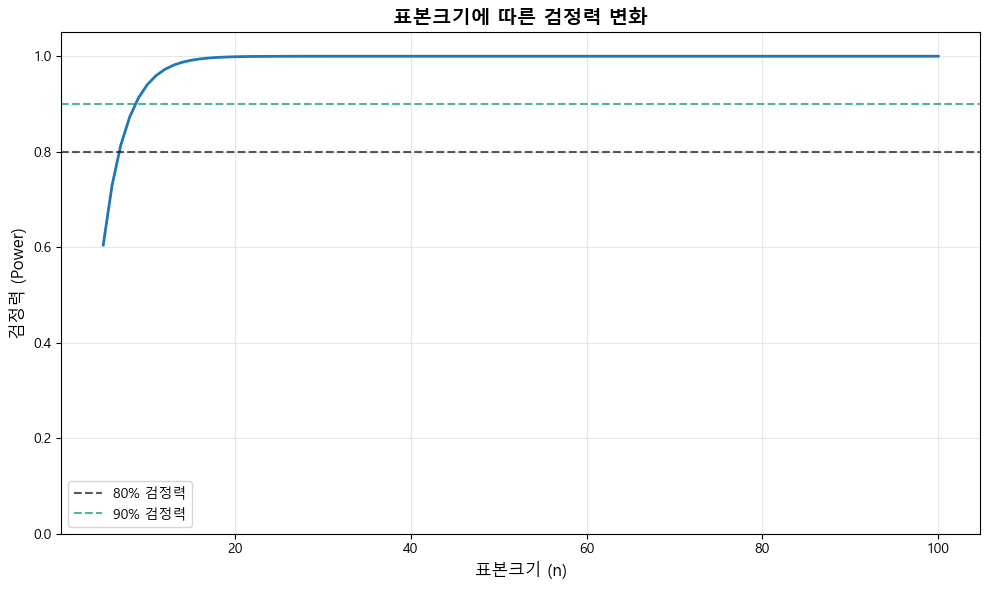

In [17]:
# TODO (c): 검정력 곡선 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# TODO: n_range에 대해 검정력을 계산하고 plot 하세요
n_range = np.arange(5, 101)
powers = []
analysis = TTestPower()

d = mu_d / s_d
target_power = 0.8

for n in n_range:
    se = s_d / np.sqrt(n)
    t_crit = stats.t.ppf(1 - alpha, df = n - 1)
    x_crit = 0 + t_crit * se
    power2 = stats.norm.sf(x_crit, loc = mu_d, scale = se)
    powers.append(power2)

ax.plot(n_range, powers, linewidth = 2)
ax.axhline(0.80, color="#141312", linestyle='--', alpha=0.7, label='80% 검정력')
ax.axhline(0.90, color='#059669', linestyle='--', alpha=0.7, label='90% 검정력')
ax.set_xlabel('표본크기 (n)', fontsize=12)
ax.set_ylabel('검정력 (Power)', fontsize=12)
ax.set_title('표본크기에 따른 검정력 변화', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()